Loading and Merging

In [7]:
!pip install pandas numpy seaborn matplotlib scikit-learn


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

/var/folders/jr/55yqw22n1_n4th6my741s7g00000gn/T/ipykernel_6061/2771901887.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
asyshare = pd.read_stata('data/sharewX_rel8-0-0_easySHARE_stata/easySHARE_rel8-0-0.dta')

illness_before = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/illness_before_module_v01.dta")
illness_during = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/illness_during_module_v01.dta")
job = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/job_module_v01.dta")
life = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/life_module_v01.dta")
young_age = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/young_age_module_v01.dta")
yearly = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/yearly_module_v01.dta")
# individual_year = pd.read_stata(\"data/SHARE-ENV - Exposure to Environmental Hazards/individual_year_panel_v01.dta\")  NB times out, I ran it for 2+hrs,

df = pd.merge(easyshare, life, on=['mergeid', 'wave'], how='left')
#merged.to_pickle(\"data/df_merged.pkl\"

In [10]:
df = pd.merge(easyshare, life, on=['mergeid', 'wave'], how='left')
df = pd.merge(df, job, on=['mergeid'], how='left')

In [11]:
df_sorted = df.sort_values(by=['mergeid', 'wave'], ascending=[True, False])
df_most_recent_wave_per_mergeid = df_sorted.drop_duplicates(subset='mergeid', keep='first')

In [12]:
df_most_recent_wave_per_mergeid

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,yjob_tn_neg5_w,yjob_tx_25_27p5_mean,yjob_tx_25_27p5_median,yjob_tx_25_27p5_w,yjob_tx_27p5_30_mean,yjob_tx_27p5_30_median,yjob_tx_27p5_30_w,yjob_tx_g30_mean,yjob_tx_g30_median,yjob_tx_g30_w
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AT-000674-01,AT-000674-A,,6,456,1. Longitudinal questionnaire,2015,6. June,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,AT-001215-01,AT-001215-A,,8,45678,1. Longitudinal questionnaire,2020,1. January,11. Austria,40. Austria,...,961.412781,359.674042,340.5,413.609985,184.639114,177.5,215.542038,86.916176,86.5,92.543343
16,AT-001492-01,AT-001492-A,AT-001492-01-02,8,45678,1. Longitudinal questionnaire,2020,2. February,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412103,SK-995042-01,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,1212.905640,1161.859985,1173.0,1172.955933,818.739990,846.0,840.694641,664.140015,692.0,691.040222
412105,SK-995042-02,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,1378.774780,1359.319946,1374.0,1373.268677,951.159973,977.0,973.190430,822.940002,858.5,855.598572
412107,SK-996004-01,SK-996004-A,,8,78,0. Baseline questionnaire,2020,2. February,63. Slovakia,703. Slovakia,...,1557.454102,604.861084,615.0,664.630554,344.666656,340.5,389.068481,190.055557,157.5,233.034607
412108,SK-999958-01,SK-999958-A,SK-999958-01-02,7,7,0. Baseline questionnaire,2017,8. August,63. Slovakia,703. Slovakia,...,1035.219971,1049.370361,1065.0,1074.776978,682.814819,693.0,715.298401,489.703705,502.0,551.870544


Preprocessing

In [13]:
df_relevant = df_most_recent_wave_per_mergeid[df_most_recent_wave_per_mergeid.columns.drop(list(df.filter(regex='^euro')))]
df_relevant = df_relevant[df_relevant.columns.drop(list(df_relevant.filter(regex='^dn')))]
non_predictive_vars = [
    'mergeid',    # Used for merging records, no predictive power
    'hhid',       # Household identifier for tracking or grouping data
    'coupleid',   # Links records of individuals within a household
    'int_version',# Version of the questionnaire or interview format
    'int_year',   # Year the interview was conducted, structural rather than predictive
    'int_month',  # Month the interview was conducted, similar to int_year
    'country',    # Country code, used for stratification or adjustments
    'country_mod', # Modified country code, typically for data manipulation
    'wavepart'   # Wave part, used for stratification or adjustments
]
df_relevant = df_relevant[df_relevant.columns.drop(non_predictive_vars)]

In [14]:
df_relevant

,wave,language,female,age,birth_country,citizenship,iv009_mod,q34_re,isced1997_r,eduyears_mod,...,yjob_tn_neg5_w,yjob_tx_25_27p5_mean,yjob_tx_25_27p5_median,yjob_tx_25_27p5_w,yjob_tx_27p5_30_mean,yjob_tx_27p5_30_median,yjob_tx_27p5_30_w,yjob_tx_g30_mean,yjob_tx_g30_median,yjob_tx_g30_w
1,2,11. German (at),0. male,54.700001,40. Austria,40. Austrian,5. A rural area or village,-13. not asked in this wave,3. ISCED-97 code 3,-3. implausible value/suspected wrong,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,11. German (at),1. female,51.700001,40. Austria,40. Austrian,5. A rural area or village,-13. not asked in this wave,3. ISCED-97 code 3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,11. German (at),1. female,63.299999,40. Austria,40. Austrian,-9. filtered: interview not at home,-13. not asked in this wave,5. ISCED-97 code 5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8,11. German (at),1. female,80.800003,528. Netherlands,528. Dutch (Netherlands),-9. filtered: interview not at home,-13. not asked in this wave,5. ISCED-97 code 5,15.0,...,961.412781,359.674042,340.5,413.609985,184.639114,177.5,215.542038,86.916176,86.5,92.543343
16,8,11. German (at),1. female,68.0,40. Austria,40. Austrian,2. The suburbs or outskirts of a big city,-13. not asked in this wave,3. ISCED-97 code 3,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412103,8,63. Slovakian,1. female,61.799999,703. Slovakia,703. Slovakian,3. A large town,-13. not asked in this wave,3. ISCED-97 code 3,-15. no information,...,1212.905640,1161.859985,1173.0,1172.955933,818.739990,846.0,840.694641,664.140015,692.0,691.040222
412105,8,63. Slovakian,0. male,64.599998,703. Slovakia,703. Slovakian,3. A large town,-13. not asked in this wave,3. ISCED-97 code 3,-15. no information,...,1378.774780,1359.319946,1374.0,1373.268677,951.159973,977.0,973.190430,822.940002,858.5,855.598572
412107,8,63. Slovakian,1. female,58.299999,703. Slovakia,703. Slovakian,4. A small town,-13. not asked in this wave,3. ISCED-97 code 3,13.0,...,1557.454102,604.861084,615.0,664.630554,344.666656,340.5,389.068481,190.055557,157.5,233.034607
412108,7,63. Slovakian,0. male,71.199997,703. Slovakia,703. Slovakian,2. The suburbs or outskirts of a big city,-13. not asked in this wave,3. ISCED-97 code 3,11.0,...,1035.219971,1049.370361,1065.0,1074.776978,682.814819,693.0,715.298401,489.703705,502.0,551.870544


In [15]:
def replace_dash_with_na(df_relevant):
    for column in df_relevant.columns:
        if df_relevant[column].dtype == 'category':
            # Replace entries containing '-' with NA
            df_relevant[column] = df[column].apply(lambda x: pd.NA if '-' in str(x) else x)
    return df_relevant

df_relevant = replace_dash_with_na(df_relevant)

In [50]:
na_counts = df_relevant.isna().sum()

na_counts_sorted = na_counts.sort_values(ascending=False)

na_counts_sorted

bmi2           140125
sp009_3_mod    138270
books_age10    137092
sp003_3_mod    137076
q34_re         136641
                ...  
partnerinhh         0
hhsize              0
language            0
thinc_m             0
wave                0
Length: 416, dtype: int64

In [51]:
for column in df_relevant.columns:
    if df_relevant[column].dtype == object:  # Check if the column data type is object
        # Try converting the column to numeric
        converted_column = pd.to_numeric(df_relevant[column], errors='coerce')
        # Check if the conversion did not introduce any new NaNs (i.e., all NaNs in the original are NaNs in the converted)
        if converted_column.notna().equals(df_relevant[column].notna()):
            df_relevant[column] = converted_column

df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140125 entries, 1 to 412109
Columns: 416 entries, wave to yjob_tx_g30_w
dtypes: category(7), float32(309), float64(50), int8(1), object(49)
memory usage: 273.2+ MB


In [52]:
columns_to_drop = na_counts[na_counts > 20000].index


df_dropped = df_relevant.drop(columns=columns_to_drop)

shape_of_dataframe_full = df_relevant.shape
shape_of_dataframe_dropped = df_dropped.shape

print(f"No. of samples: {shape_of_dataframe_full[0]}")
print(f"No. of columns (full): {shape_of_dataframe_full[1]}")
print(f"No. of columns (dropped): {shape_of_dataframe_dropped[1]}")

columns_to_drop

No. of samples: 140125
No. of columns (full): 416
No. of columns (dropped): 32


Index(['q34_re', 'isced1997_r', 'int_partner', 'age_partner', 'gender_partner',
       'siblings_alive', 'ch001_', 'ch021_mod', 'ch007_hh', 'ch007_km',
       ...
       'yjob_tn_neg5_w', 'yjob_tx_25_27p5_mean', 'yjob_tx_25_27p5_median',
       'yjob_tx_25_27p5_w', 'yjob_tx_27p5_30_mean', 'yjob_tx_27p5_30_median',
       'yjob_tx_27p5_30_w', 'yjob_tx_g30_mean', 'yjob_tx_g30_median',
       'yjob_tx_g30_w'],
      dtype='object', length=384)

In [53]:
na_after_dr = df_dropped.isna().sum().sort_values(ascending=False)

In [54]:
na_after_dr

maxgrip          18766
eduyears_mod     17840
iv009_mod        13522
recall_1         12337
recall_2         12257
bmi              11766
co007_           10559
father_alive     10501
mother_alive     10032
hc029_            8736
hc002_mod         8335
finemotor         7109
mobilityind       7109
grossmotor        7109
adla              6929
iadla             6929
iadlza            6929
adlwa             6929
hc012_            6834
lgmuscle          6785
chronic_mod       6716
mar_stat          6606
birth_country     1696
citizenship       1554
sphus             1020
age                 23
wave                 0
language             0
partnerinhh          0
hhsize               0
female               0
thinc_m              0
dtype: int64

In [55]:
shape_of_df_dropped = df_dropped.shape
print(f"The DataFrame has {shape_of_df_dropped[0]} rows and {shape_of_df_dropped[1]} columns.")
columns_in_df_dropped = df_dropped.columns.tolist()

print("Columns in df_dropped:")
print(columns_in_df_dropped)

The DataFrame has 140125 rows and 32 columns.
Columns in df_dropped:
['wave', 'language', 'female', 'age', 'birth_country', 'citizenship', 'iv009_mod', 'eduyears_mod', 'mar_stat', 'hhsize', 'partnerinhh', 'mother_alive', 'father_alive', 'sphus', 'chronic_mod', 'hc002_mod', 'hc012_', 'hc029_', 'maxgrip', 'adlwa', 'adla', 'iadla', 'iadlza', 'mobilityind', 'lgmuscle', 'grossmotor', 'finemotor', 'recall_1', 'recall_2', 'bmi', 'co007_', 'thinc_m']



EDA label variable

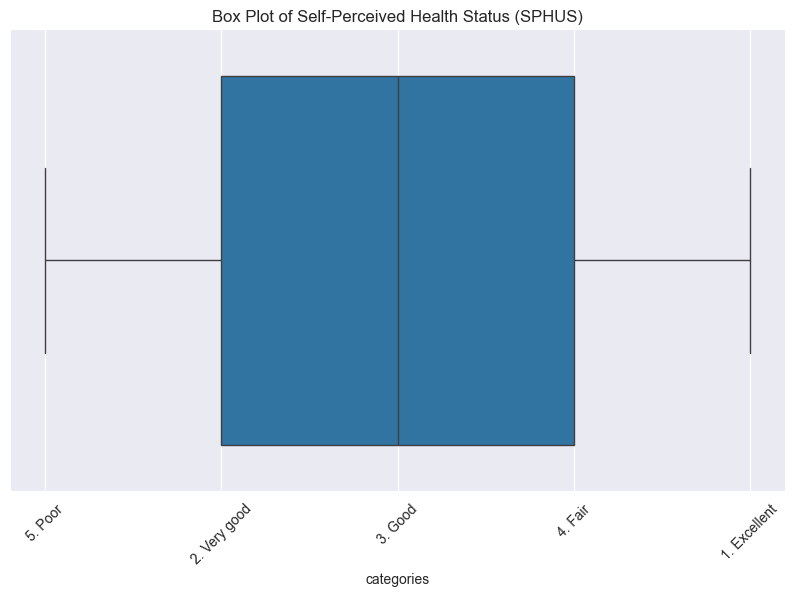

In [56]:
# box plot - doesn't make sense to do boxplot??
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_dropped['sphus'])
plt.title('Box Plot of Self-Perceived Health Status (SPHUS)')
plt.xlabel('categories')
plt.xticks(rotation=45)
plt.show()

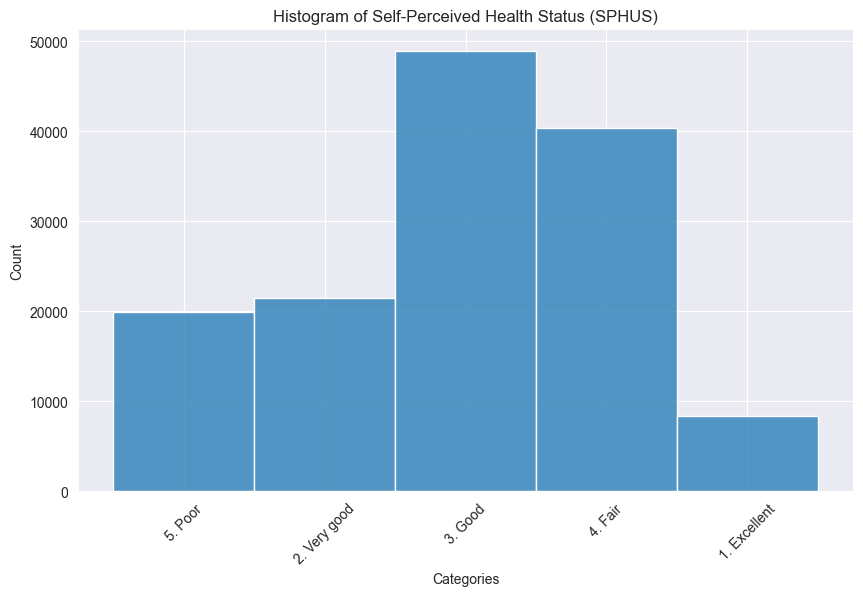

In [57]:
# histo
plt.figure(figsize=(10, 6))
sns.histplot(df_dropped['sphus'], discrete=True)
plt.title('Histogram of Self-Perceived Health Status (SPHUS)')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.show()

Grouped Feature Selection

In [16]:
variable_names = df_relevant.columns.tolist()

# Initialize lists for each category
temperature_vars = []
radiation_vars = []
precipitation_vars = []
pollution_vars = {'PM2.5': [], 'PM10': [], 'NO2': [], 'O3': []}
flood_vars = []
heating_cooling_vars = []  # For Heating Degree Days (HDD) and Cooling Degree Days (CDD)

for var in variable_names:
    # Temperature variables
    if 'tn_' in var or 'tg_' in var or 'tx_' in var:
        temperature_vars.append(var)
    
    # Radiation variables
    elif 'radiation' in var:
        radiation_vars.append(var)
    
    # Precipitation variables
    elif 'prec' in var:
        precipitation_vars.append(var)
    
    # Pollution variables
    elif 'pm2p5' in var or 'conc_pm2p5' in var:
        pollution_vars['PM2.5'].append(var)
    elif 'pm10' in var or 'conc_pm10' in var:
        pollution_vars['PM10'].append(var)
    elif 'no2' in var or 'conc_no2' in var:
        pollution_vars['NO2'].append(var)
    elif 'o3' in var or 'conc_o3' in var:
        pollution_vars['O3'].append(var)
    
    # Flood variables
    elif 'fl_' in var:
        flood_vars.append(var)
    
    # Heating and Cooling Degree Days
    elif 'HDD' in var or 'CDD' in var:
        heating_cooling_vars.append(var)

In [17]:
feature_groups = {
    'temperature': temperature_vars,
    'radiation': radiation_vars,
    'precipitation': precipitation_vars,
    'pollution_PM2.5': pollution_vars['PM2.5'],
    'pollution_PM10': pollution_vars['PM10'],
    'pollution_NO2': pollution_vars['NO2'],
    'pollution_O3': pollution_vars['O3'],
    'floods': flood_vars,
    'heating_cooling': heating_cooling_vars
}

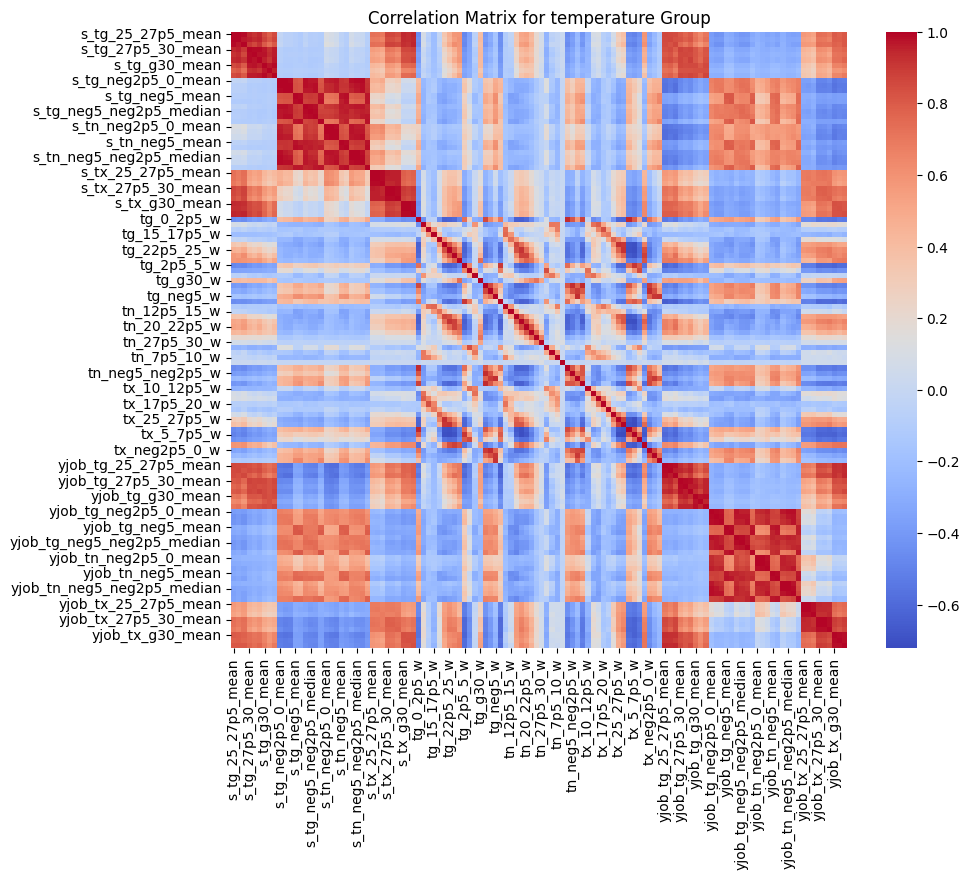

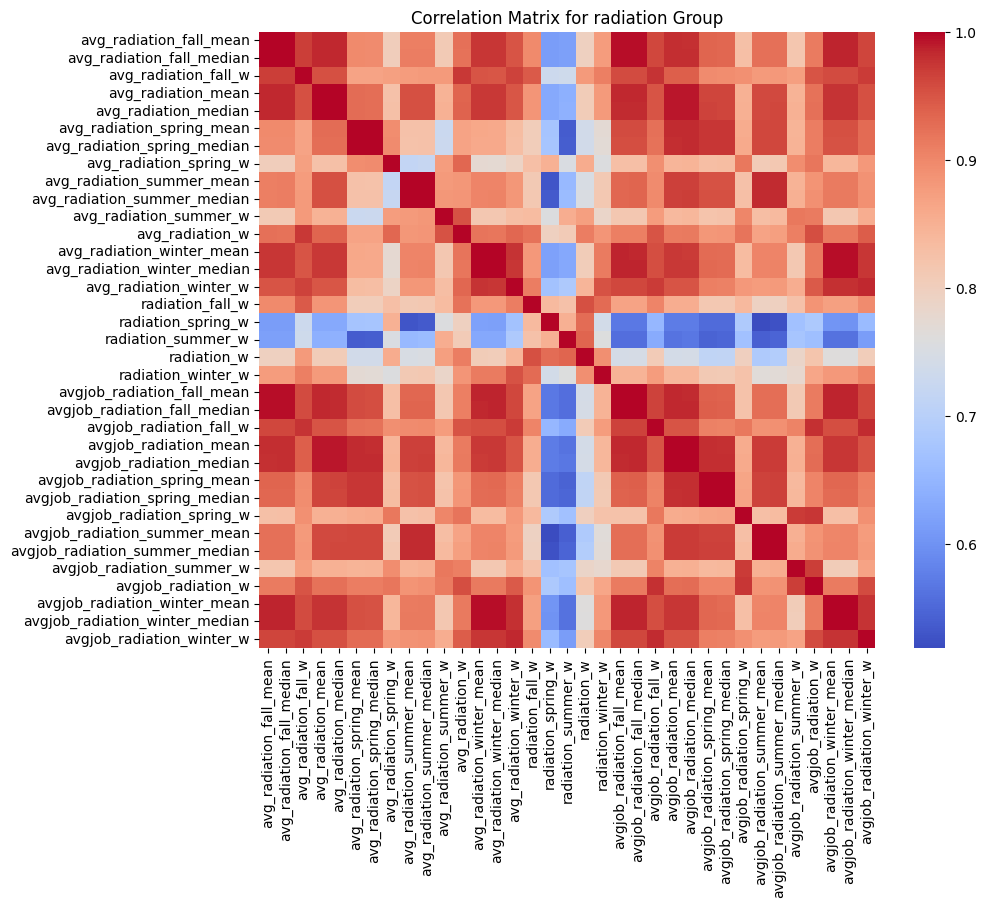

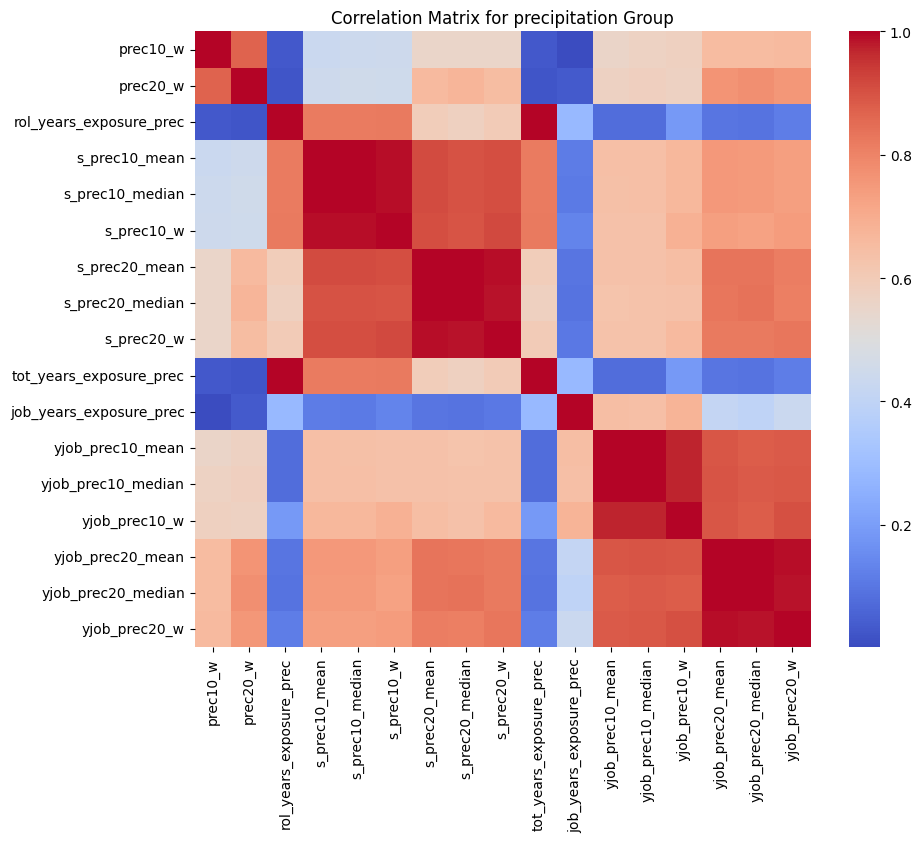

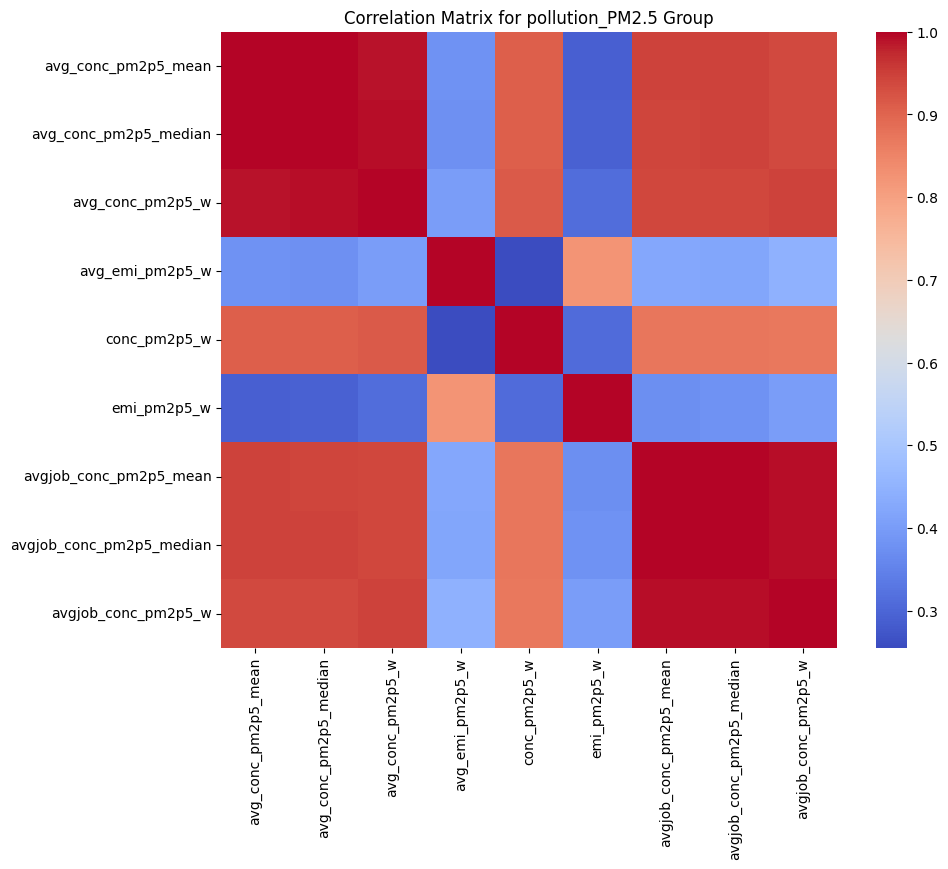

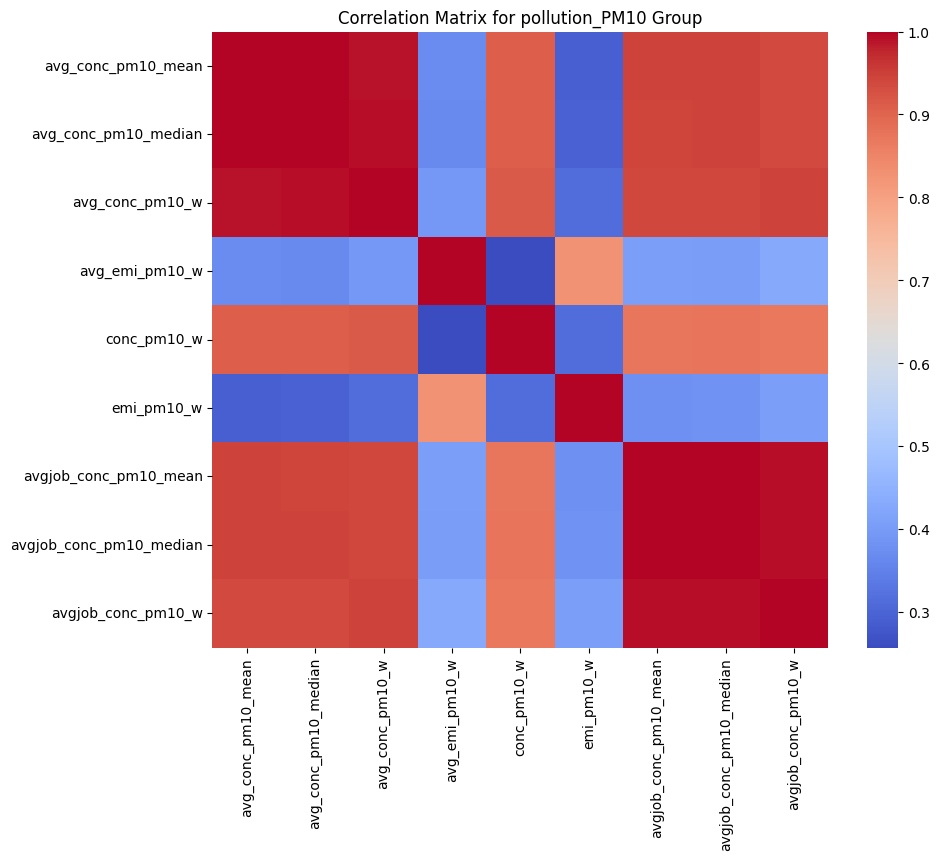

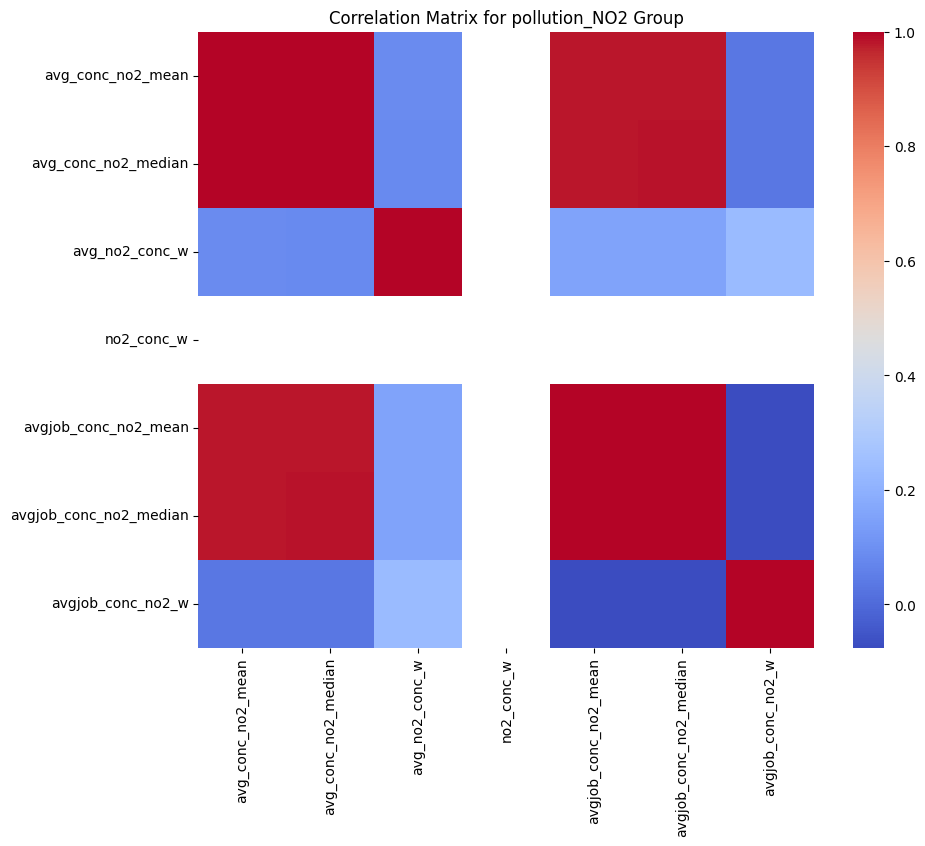

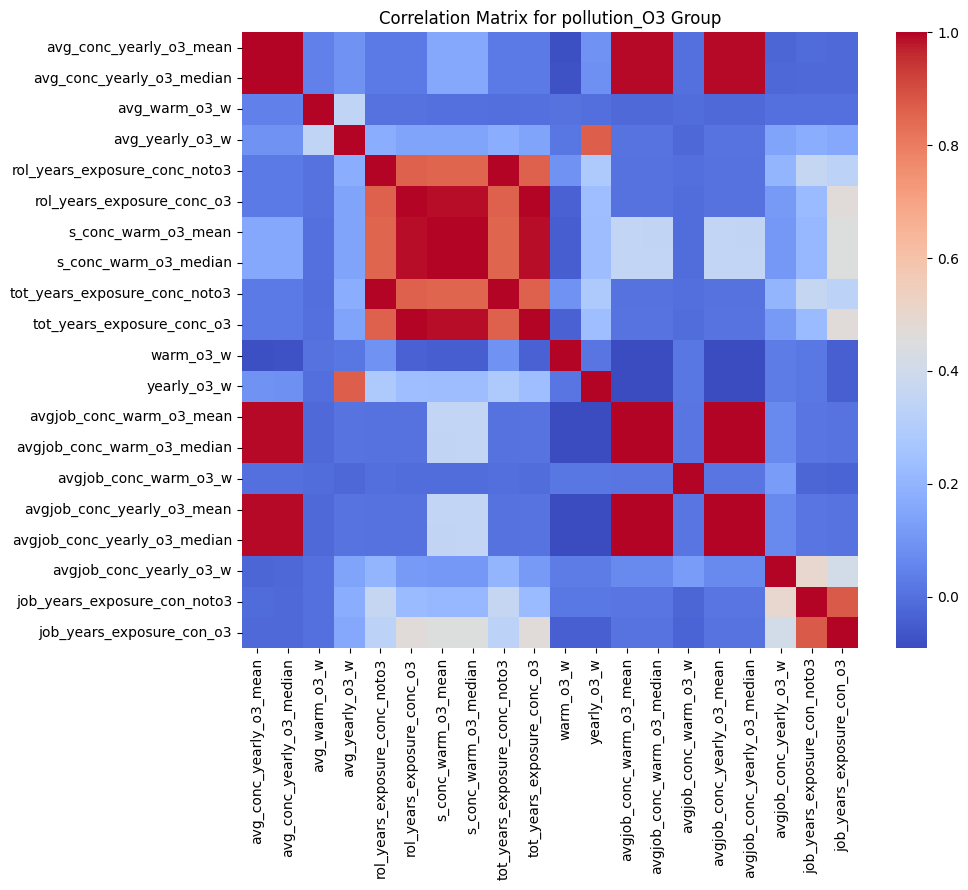

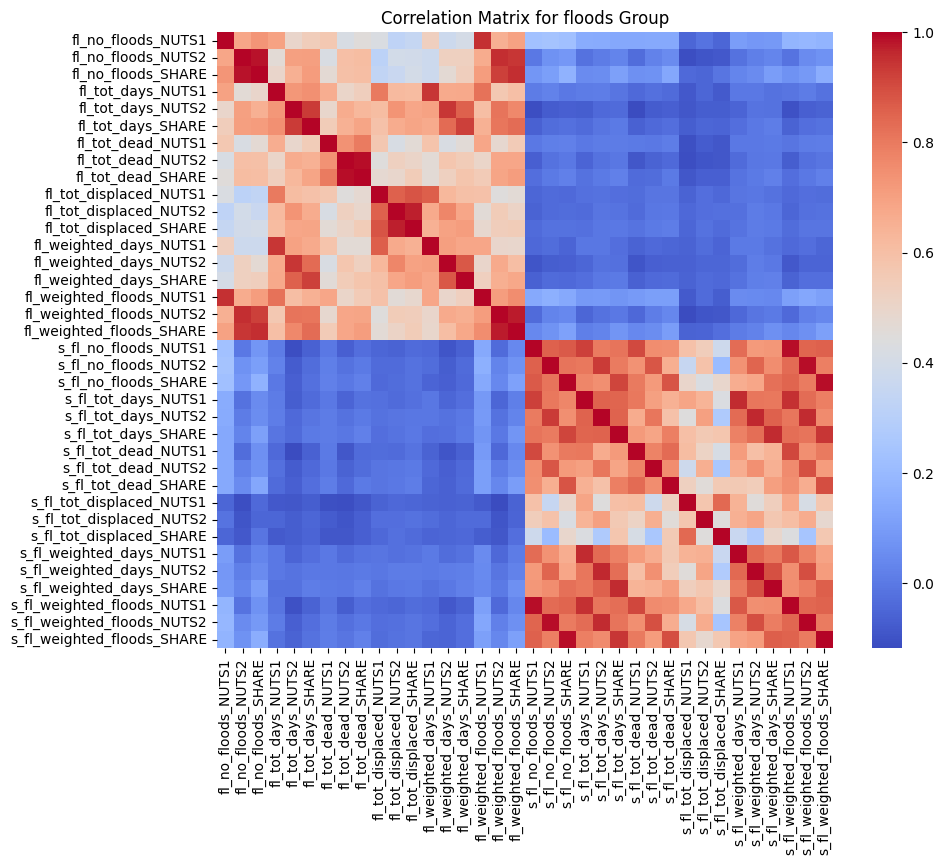

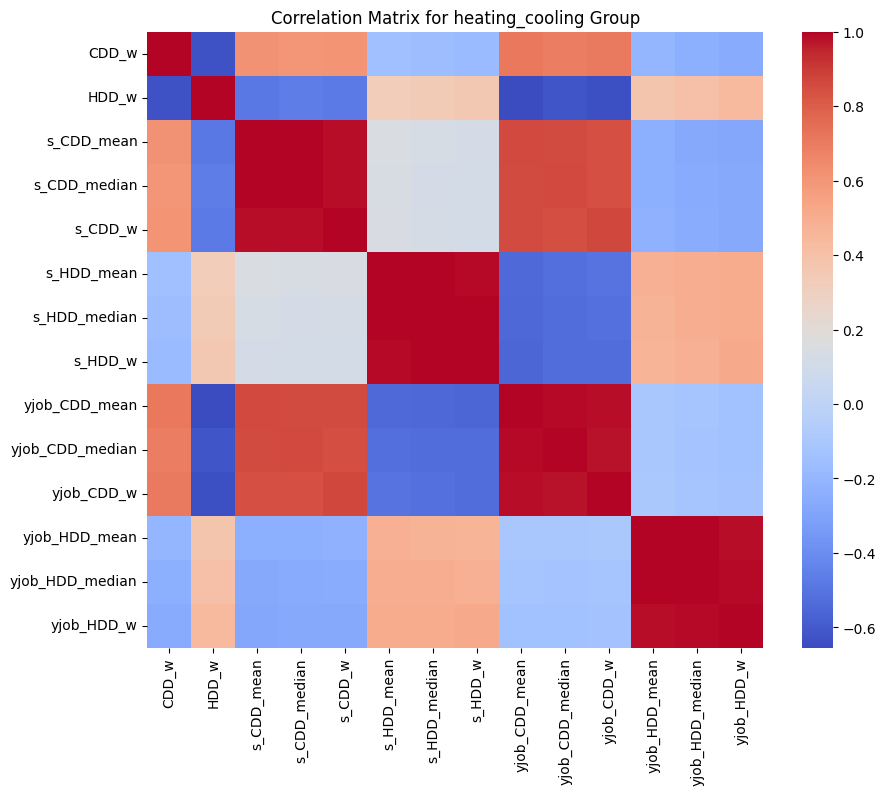

In [17]:
for group_name, features in feature_groups.items():
    # Filter the DataFrame to keep only the current group's features
    df_group = df_relevant[features]
    
    # Calculate the correlation matrix
    corr_matrix = df_group.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title(f'Correlation Matrix for {group_name} Group')
    plt.show()

Split the data

In [18]:
df_relevant = df_relevant.dropna(subset=['sphus'])

In [19]:
# Define features and target
X = df_relevant.drop('sphus', axis=1)  # Predictor variables
y = df_relevant['sphus']  # Outcome variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalize the data

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [21]:
X_train_cleaned = X_train.dropna(axis=1, how='all')
X_test_cleaned = X_test.dropna(axis=1, how='all')

In [22]:
categorical_columns = X_train_cleaned.select_dtypes(include='object').columns
X_train_cleaned.loc[:, categorical_columns] = X_train_cleaned.loc[:, categorical_columns].fillna("missing")
X_test_cleaned.loc[:, categorical_columns] = X_test_cleaned.loc[:, categorical_columns].fillna("missing")

In [23]:
numeric_columns = X_train_cleaned.select_dtypes(include=np.number).columns
numeric_imputer = SimpleImputer(strategy='mean')

In [24]:
X_train_imputed = numeric_imputer.fit_transform(X_train_cleaned[numeric_columns])
X_test_imputed = numeric_imputer.transform(X_test_cleaned[numeric_columns])

In [25]:
scaler = StandardScaler() 

In [26]:
X_train_scaled = scaler.fit_transform(X_train_imputed)  # Fit and scale the training data
X_test_scaled = scaler.transform(X_test_imputed)  # Scale the testing data

In [27]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns)

In [28]:
print("Normalized DataFrames:")
print("X_train_scaled_df:")
print(X_train_scaled_df.head())
print("X_test_scaled_df:")
print(X_test_scaled_df.head())

Normalized DataFrames:
X_train_scaled_df:
       wave   thinc_m         CDD_w     HDD_w  avg_conc_no2_mean  \
0 -1.009368 -0.008501 -1.003555e+00 -0.772645      -6.887624e-01   
1 -1.967597 -0.008617 -7.039936e-01  1.161806      -6.387740e-01   
2 -0.530253 -0.008496  4.288448e+00 -2.596975      -1.328543e+00   
3  0.427976 -0.008345  3.646755e-16  0.000000       1.095512e+00   
4  0.907091 -0.008726  3.646755e-16  0.000000       6.115836e-16   

   avg_conc_no2_median  avg_conc_pm10_mean  avg_conc_pm10_median  \
0        -8.433031e-01       -6.361429e-01         -7.973714e-01   
1        -7.490248e-01       -4.396796e-02         -1.076542e-01   
2        -1.400184e+00       -1.094426e+00         -1.105054e+00   
3         1.194358e+00        2.770998e+00          2.758927e+00   
4        -5.905315e-16       -7.114240e-16          1.395520e-15   

   avg_conc_pm10_w  avg_conc_pm2p5_mean  ...  yjob_tn_neg5_w  \
0        -0.584728        -6.914544e-01  ...    4.423385e-16   
1        -0.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)

# Dictionary to store the most important features by group
best_features = {}

# Iterate over each feature group to identify the most important feature
for group_name, features in feature_groups.items():
    # Ensure the feature group is not empty and contains valid features
    if not features:
        continue
    
    # Select the current group's features from the scaled training data
    # Check if the feature group exists in the cleaned and scaled data
    valid_features = X_train_scaled_df.columns.intersection(features)

    if valid_features.empty:
        print(f"{group_name}: No valid features after data preparation.")
        continue

    # Train the Random Forest model on the selected features
    rf_model.fit(X_train_scaled_df[valid_features], y_train)

    # Get the feature importances and find the most important one
    importances = rf_model.feature_importances_
    most_important_feature = valid_features[np.argmax(importances)]
    best_features[group_name] = most_important_feature

    # Optionally, evaluate the model's performance on the test data
    predictions = rf_model.predict(X_test_scaled_df[valid_features])
    accuracy = accuracy_score(y_test, predictions)
    print(f"{group_name} - Most Important Feature: {most_important_feature}, Accuracy: {accuracy:.4f}")

# Output the best features from each group
print("Best Features by Group:", best_features)

temperature - Most Important Feature: s_tx_25_27p5_mean, Accuracy: 0.3623
radiation - Most Important Feature: avgjob_radiation_fall_median, Accuracy: 0.3542
precipitation - Most Important Feature: tot_years_exposure_prec, Accuracy: 0.3618
pollution_PM2.5 - Most Important Feature: avgjob_conc_pm2p5_w, Accuracy: 0.3511
pollution_PM10 - Most Important Feature: avgjob_conc_pm10_w, Accuracy: 0.3549
pollution_NO2 - Most Important Feature: avgjob_conc_no2_w, Accuracy: 0.3592
pollution_O3 - Most Important Feature: avgjob_conc_yearly_o3_w, Accuracy: 0.3579
floods - Most Important Feature: s_fl_tot_dead_SHARE, Accuracy: 0.3526
heating_cooling - Most Important Feature: s_HDD_w, Accuracy: 0.3603
Best Features by Group: {'temperature': 's_tx_25_27p5_mean', 'radiation': 'avgjob_radiation_fall_median', 'precipitation': 'tot_years_exposure_prec', 'pollution_PM2.5': 'avgjob_conc_pm2p5_w', 'pollution_PM10': 'avgjob_conc_pm10_w', 'pollution_NO2': 'avgjob_conc_no2_w', 'pollution_O3': 'avgjob_conc_yearly_o

In [30]:
# Step 1: Convert best_features values to a set for faster lookup
best_features_set = set(best_features.values())

# Step 2: Initialize a list to hold variables to drop
vars_to_drop = []

# Step 3: Identify variables to drop from each feature group
for group_name, features in feature_groups.items():
    vars_to_drop.extend([var for var in features if var not in best_features_set])

# Step 4: Drop these unwanted variables from the scaled DataFrames
X_train_selected = X_train_scaled_df.drop(columns=vars_to_drop, errors='ignore')
X_test_selected = X_test_scaled_df.drop(columns=vars_to_drop, errors='ignore')

# Step 5: Re-fit the transformation pipeline for consistent scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_train_s_scaled = pipeline.fit_transform(X_train_selected)  # Fit and transform the selected training data
X_test_s_scaled = pipeline.transform(X_test_selected)  # Transform the selected test data

# Step 6: Output the shape of original and modified DataFrames to check consistency
print("Original X_train_scaled_df shape:", X_train_scaled_df.shape)
print("Modified X_train_s_scaled shape:", X_train_s_scaled.shape)

print("Original X_test_scaled_df shape:", X_test_scaled_df.shape)
print("Modified X_test_s_scaled shape:", X_test_s_scaled.shape)

Original X_train_scaled_df shape: (111284, 331)
Modified X_train_s_scaled shape: (111284, 73)
Original X_test_scaled_df shape: (27821, 331)
Modified X_test_s_scaled shape: (27821, 73)


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a new RandomForestClassifier
rf_top_grouped = RandomForestClassifier(random_state=42)

# Fit the RandomForest model on the selected and scaled training data
rf_top_grouped.fit(X_train_s_scaled, y_train)

# Get the parameters of the fitted RandomForestClassifier instance
rf_grouped_parameters = rf_top_grouped.get_params()

# Display each parameter and its value
print("Parameters of the RandomForestClassifier:")
for param, value in rf_grouped_parameters.items():
    print(f"The parameter '{param}' is set to {value}.")

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50],  # Simplified for speed
    'max_depth': [None, 5, 10],   # Reduced options
    'min_samples_split': [2, 4],  # Default and one variation
}

rf = RandomForestClassifier(random_state=42)

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)  

try:
    cv_rf.fit(X_train_s_scaled, y_train)  
except Exception as e:
    print("Error during GridSearchCV fitting:", e)  

try:
    y_pred = cv_rf.predict(X_test_s_scaled) 
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
except Exception as e:
    print("Error during prediction:", e)  

Initial Random Forest Fitting and Feature Selection

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the limited Random Forest model
rf_limitted = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)

# Feature counts to evaluate
feature_counts = [50, 100, 150, 200, X_train_s_scaled.shape[1]]  # Evaluate different feature counts

# Dictionary to store the average accuracy for each feature count
results = {}

# Iterate over the feature counts
for count in feature_counts:
    # Select the first N features
    X_train_subset = X_train_s_scaled[:, :count]
    X_test_subset = X_test_s_scaled[:, :count]

    # Re-fit the imputation and scaling pipeline
    X_train_scaled_subset = pipeline.fit_transform(X_train_subset)  # Re-fit for each subset
    X_test_scaled_subset = pipeline.transform(X_test_subset)

    # Evaluate the model with cross-validation
    scores = cross_val_score(rf_limitted, X_train_scaled_subset, y_train, cv=5, scoring='accuracy')

    # Store the average accuracy for this feature count
    results[count] = np.mean(scores)
    print(f"Average accuracy with top {count} features: {results[count]:.4f}")

KeyboardInterrupt: 

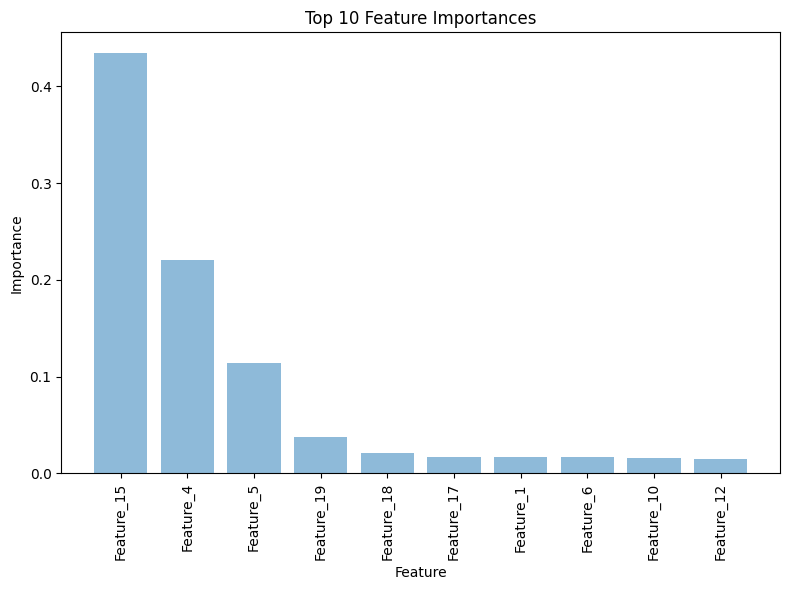

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate sample data with 20 features
X, y = make_classification(n_samples=500, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with imputation and scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the training data
X_train_cleaned = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_cleaned = pipeline.transform(X_test)

# Create feature names based on the number of columns
num_features = X_train_cleaned.shape[1]
feature_names = [f'Feature_{i}' for i in range(num_features)]

# Convert cleaned data to DataFrames with feature names
X_train_df = pd.DataFrame(X_train_cleaned, columns=feature_names)
X_test_df = pd.DataFrame(X_test_cleaned, columns=feature_names)

# Fit the Random Forest model on the cleaned training data
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)
rf.fit(X_train_df, y_train)

# Get feature importances and sort them
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1][:10]  # Top 10 features

# Plot the top 10 feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(10), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(10), [feature_names[i] for i in sorted_indices], rotation=90, fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

Refitting model with 100 features

In [40]:
feature_importances = rf_model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
top_100_indices = sorted_indices[:100]

top_100_feature_names = X_train_scaled_df.columns[top_100_indices]

all_feature_names = X_train_scaled_df.columns.tolist()

rejected_feature_names = [feature for feature in all_feature_names if feature not in top_100_feature_names]

print("Top 100 features:")
print(top_100_feature_names.tolist())

print("Rejected features:")
print(rejected_feature_names)

Top 100 features:
['chronic_mod', 'maxgrip', 'adlwa', 'age_partner', 'casp', 'eduyears_mod', 'ch001_', 'siblings_alive', 'ch021_mod', 'wave', 'adla', 'age', 'iadla', 'iadlza']
Rejected features:
['mobilityind', 'lgmuscle', 'grossmotor', 'finemotor', 'recall_1', 'recall_2', 'bmi', 'ep013_mod', 'thinc_m', 'income_pct_w1', 'income_pct_w2', 'income_pct_w4', 'income_pct_w5', 'income_pct_w6', 'income_pct_w7', 'income_pct_w8', 'CDD_w', 'HDD_w', 'avg_conc_no2_mean', 'avg_conc_no2_median', 'avg_conc_pm10_mean', 'avg_conc_pm10_median', 'avg_conc_pm10_w', 'avg_conc_pm2p5_mean', 'avg_conc_pm2p5_median', 'avg_conc_pm2p5_w', 'avg_conc_yearly_o3_mean', 'avg_conc_yearly_o3_median', 'avg_emi_pm10_w', 'avg_emi_pm2p5_w', 'avg_emissionPM10_mean', 'avg_emissionPM10_median', 'avg_emissionPM25_mean', 'avg_emissionPM25_median', 'avg_fall_mean', 'avg_fall_median', 'avg_no2_conc_w', 'avg_radiation_fall_mean', 'avg_radiation_fall_median', 'avg_radiation_fall_w', 'avg_radiation_mean', 'avg_radiation_median', 'avg

PCA

In [18]:
#From df_relevant = replace_dash_with_na(df_relevant)

In [19]:
numeric_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [20]:
numeric_cols = df_relevant.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_relevant[numeric_cols]

In [21]:
pipeline = Pipeline([
    ('imputer', numeric_imputer),
    ('scaler', StandardScaler())
])

df_cleaned = pipeline.fit_transform(df_numeric)

In [22]:
n_components = min(df_cleaned.shape[0], df_cleaned.shape[1])  
pca = PCA(n_components=n_components)

df_pca = pca.fit_transform(df_cleaned)

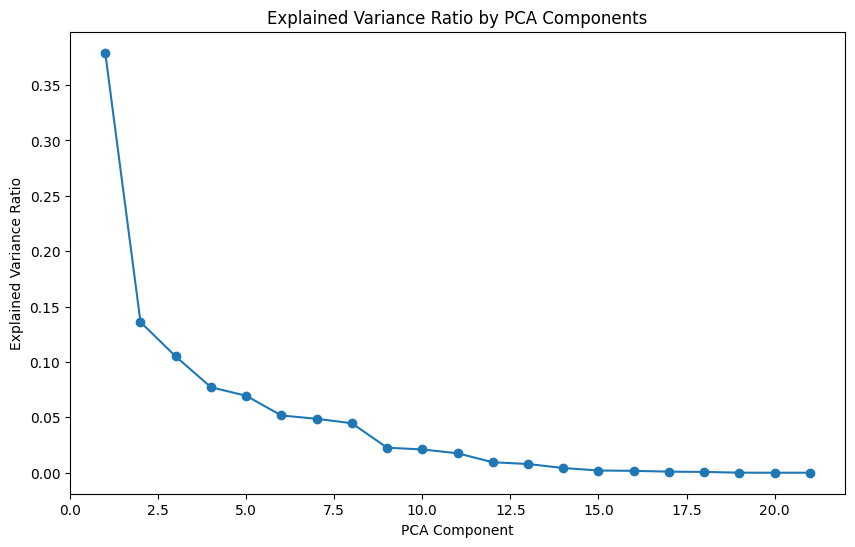

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

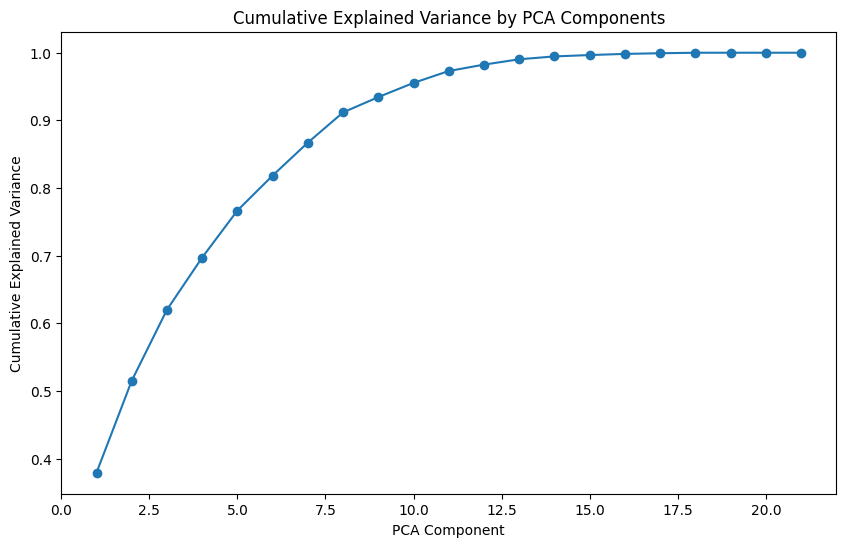

In [24]:
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('PCA Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [41]:
n_optimal_components = len(cumulative_explained_variance[cumulative_explained_variance < 0.90]) + 1

In [42]:
pca_subset = df_pca[:, :n_optimal_components]

In [43]:
pca_loadings = pca.components_

In [44]:
print("Shape of PCA loadings:", pca_loadings.shape)

Shape of PCA loadings: (21, 21)


In [45]:
first_component = pca_loadings[0] 

In [46]:
top_features_indices = np.argsort(np.abs(first_component))[::-1]

In [47]:
top_features_names = df_numeric.columns[top_features_indices]

In [48]:
print("Top features for the first principal component:")
print(top_features_names[:20])

Top features for the first principal component:
Index(['fl_tot_days_SHARE', 'fl_tot_days_NUTS2', 'fl_tot_days_NUTS1',
       'fl_tot_dead_SHARE', 'fl_tot_displaced_SHARE', 'fl_tot_displaced_NUTS1',
       'fl_tot_dead_NUTS2', 'fl_tot_displaced_NUTS2', 'fl_no_floods_SHARE',
       'fl_tot_dead_NUTS1', 'fl_no_floods_NUTS2', 'fl_no_floods_NUTS1',
       'conc_pm2p5_w', 'conc_pm10_w', 'yearly_o3_w', 'CDD_w', 'HDD_w',
       'emi_pm10_w', 'emi_pm2p5_w', 'warm_o3_w'],
      dtype='object')


PCA Lists

In [49]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute with mean for numerical data
    ('scaler', StandardScaler())  # Standardize features
])

In [50]:
pca_subsets = {}
for group_name, features in feature_groups.items():
    df_group = df_relevant[features]  # Select features for this group
    df_group_cleaned = pipeline.fit_transform(df_group)  # Clean and scale

    # Fit a new PCA model for this group
    n_components = min(df_group_cleaned.shape[0], df_group_cleaned.shape[1])
    group_pca = PCA(n_components=n_components)  # Fit with the correct feature count
    df_group_pca = group_pca.fit_transform(df_group_cleaned)  # Apply PCA
    
    # Determine the optimal number of components based on explained variance
    cumulative_explained_variance = group_pca.explained_variance_ratio_.cumsum()
    optimal_components = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1  # At least 90% variance
    
    # Retain only the optimal number of components
    pca_subsets[group_name] = df_group_pca[:, :optimal_components]

In [51]:
for group_name, subset in pca_subsets.items():
    print(f"Feature count for '{group_name}':", subset.shape[1])
# count how many features are in each subset after applying PCA with the optimal number of components.

Feature count for 'temperature': 14
Feature count for 'radiation': 3
Feature count for 'precipitation': 3
Feature count for 'pollution_PM2.5': 3
Feature count for 'pollution_PM10': 3
Feature count for 'pollution_NO2': 4
Feature count for 'pollution_O3': 7
Feature count for 'floods': 8
Feature count for 'heating_cooling': 4


Combining PCA

In [52]:
import numpy as np

In [53]:
combined_pca = np.hstack([pca_subsets[group_name] for group_name in pca_subsets.keys()])

print("Combined PCA subset shape:", combined_pca.shape)

Combined PCA subset shape: (139105, 49)


Random Forest on General PCA

In [54]:
df_relevant = df_relevant.dropna(subset=['sphus'])
X = df_relevant.drop('sphus', axis=1) 
y = df_relevant['sphus']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['language', 'female', 'age', 'birth_country', 'citizenship',
       'iv009_mod', 'q34_re', 'isced1997_r', 'eduyears_mod', 'mar_stat',
       'hhsize', 'partnerinhh', 'int_partner', 'age_partner', 'gender_partner',
       'mother_alive', 'father_alive', 'siblings_alive', 'ch001_', 'ch021_mod',
       'ch007_hh', 'ch007_km', 'sp002_mod', 'sp003_1_mod', 'sp003_2_mod',
       'sp003_3_mod', 'sp008_', 'sp009_1_mod', 'sp009_2_mod', 'sp009_3_mod',
       'books_age10', 'maths_age10', 'language_age10', 'vaccinated',
       'childhood_health', 'chronic_mod', 'casp', 'bfi10_extra_mod',
       'bfi10_agree_mod', 'bfi10_consc_mod', 'bfi10_neuro_mod',
       'bfi10_open_mod', 'hc002_mod', 'hc012_', 'hc029_', 'maxgrip', 'adlwa',
       'adla', 'iadla', 'iadlza', 'mobilityind', 'lgmuscle', 'grossmotor',
       'finemotor', 'recall_1', 'recall_2', 'orienti', 'numeracy_1',
       'numeracy_2', 'bmi', 'bmi2', 'smoking', 'ever_smoked', 'br010_mod',
       'br015_', 'ep005_', '

In [57]:
for column in non_numeric_columns:
    unique_values = X[column].unique()
    print(f"Unique values in '{column}':", unique_values)

Unique values in 'language': ['11. German (at)', '51. Bulgarian', '23. French (be)', '24. Flemish (be)', '53. Greek (cy)', ..., '33. Portuguese', '61. Romanian', '13. Swedish', '34. Slovenian', '63. Slovakian']
Length: 43
Categories (44, object): ['11. German (at)' < '12. German (de)' < '13. Swedish' < '14. Dutch (nl)' ... '60. English (mt)' < '61. Romanian' < '63. Slovakian' < '65. Catalan (es)']
Unique values in 'female': ['0. male', '1. female']
Categories (2, object): ['0. male' < '1. female']
Unique values in 'age': [54.70000076293945 51.70000076293945 63.29999923706055 80.80000305175781
 68.0 68.30000305175781 61.29999923706055 58.79999923706055
 89.69999694824219 95.30000305175781 51.400001525878906 73.5
 68.19999694824219 66.5999984741211 86.30000305175781 78.80000305175781
 71.69999694824219 71.30000305175781 77.0 77.0999984741211
 77.5999984741211 65.80000305175781 93.19999694824219 82.5999984741211
 73.19999694824219 50.900001525878906 51.0 60.599998474121094
 57.29999923706

In [58]:
for column in non_numeric_columns:
    try:
        X[column] = pd.to_numeric(X[column], errors='raise')
    except ValueError as ve:
        print(f"Conversion failed for '{column}':", ve)

Conversion failed for 'language': Unable to parse string "11. German (at)" at position 0
Conversion failed for 'female': Unable to parse string "0. male" at position 0
Conversion failed for 'birth_country': Unable to parse string "40. Austria" at position 0
Conversion failed for 'citizenship': Unable to parse string "40. Austrian" at position 0
Conversion failed for 'iv009_mod': Unable to parse string "5. A rural area or village" at position 0
Conversion failed for 'q34_re': Unable to parse string "1. Protestant" at position 6
Conversion failed for 'isced1997_r': Unable to parse string "97. Other" at position 89
Conversion failed for 'mar_stat': Unable to parse string "1. Married and living together with spouse" at position 0
Conversion failed for 'partnerinhh': Unable to parse string "1. living with a spouse/partner in household" at position 0
Conversion failed for 'int_partner': Unable to parse string "1. yes" at position 0
Conversion failed for 'gender_partner': Unable to parse stri

In [59]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

In [60]:
nan_columns = X_train.columns[X_train.isnull().any()]

print("Columns with NaNs:", nan_columns)

# Check for NaNs in categorical features
nan_categorical_features = [col for col in categorical_features if X_train[col].isnull().any()]

print("Categorical features with NaNs:", nan_categorical_features)

Columns with NaNs: Index(['age', 'birth_country', 'citizenship', 'iv009_mod', 'q34_re',
       'isced1997_r', 'eduyears_mod', 'mar_stat', 'int_partner', 'age_partner',
       ...
       'yjob_tn_neg5_w', 'yjob_tx_25_27p5_mean', 'yjob_tx_25_27p5_median',
       'yjob_tx_25_27p5_w', 'yjob_tx_27p5_30_mean', 'yjob_tx_27p5_30_median',
       'yjob_tx_27p5_30_w', 'yjob_tx_g30_mean', 'yjob_tx_g30_median',
       'yjob_tx_g30_w'],
      dtype='object', length=409)


NameError: name 'categorical_features' is not defined

In [61]:
for col in categorical_features:
    X_train[col] = X_train[col].astype('category', errors='ignore')

NameError: name 'categorical_features' is not defined

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [63]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

In [64]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

In [65]:
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  
        ('cat', categorical_transformer, categorical_features) 
    ]
)

In [66]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print("Preprocessing completed successfully.")

Preprocessing completed successfully.


In [67]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [68]:
n_components = 20  
svd = TruncatedSVD(n_components=n_components)

X_train_svd = svd.fit_transform(X_train_preprocessed)
X_test_svd = svd.transform(X_test_preprocessed)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_svd, y_train)

y_pred = rf.predict(X_test_svd)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest with SVD - Accuracy:", accuracy)
print("Classification Report:\n", report)

Random Forest with SVD - Accuracy: 0.46479278243053807
Classification Report:
               precision    recall  f1-score   support

1. Excellent       0.33      0.06      0.11      1696
2. Very good       0.38      0.21      0.27      4455
     3. Good       0.46      0.65      0.54      9739
     4. Fair       0.46      0.46      0.46      8037
     5. Poor       0.58      0.48      0.52      3894

    accuracy                           0.46     27821
   macro avg       0.44      0.37      0.38     27821
weighted avg       0.46      0.46      0.44     27821


On Subset

In [69]:
y = df_relevant.dropna(subset=['sphus'])['sphus'].iloc[:len(combined_pca)]

In [70]:
y_corrected = df_relevant.dropna(subset=['sphus'])['sphus']

# Ensure combined_pca has the same number of samples
combined_pca_aligned = combined_pca[:len(y_corrected)]

# Check that they now have the same length
print("Length of combined_pca:", len(combined_pca_aligned))
print("Length of y_corrected:", len(y_corrected))

Length of combined_pca: 139105
Length of y_corrected: 139105


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_pca_aligned, y_corrected, test_size=0.2, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest on combined PCA - Accuracy:", accuracy)
print("Classification Report:\n", report)

Random Forest on combined PCA - Accuracy: 0.345602242910032
Classification Report:
               precision    recall  f1-score   support

1. Excellent       0.16      0.05      0.08      1696
2. Very good       0.27      0.12      0.17      4455
     3. Good       0.38      0.59      0.46      9739
     4. Fair       0.33      0.34      0.33      8037
     5. Poor       0.30      0.13      0.18      3894

    accuracy                           0.35     27821
   macro avg       0.29      0.25      0.24     27821
weighted avg       0.32      0.35      0.32     27821


Logistic Reg on general PCA

In [73]:
n_components = 20 
svd = TruncatedSVD(n_components=n_components)

In [74]:
X_train_svd = svd.fit_transform(X_train_preprocessed)
X_test_svd = svd.transform(X_test_preprocessed)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log_reg = LogisticRegression(
    random_state=42, max_iter=1000, solver='liblinear',  # New solver and more iterations
    C=0.5  # Increase regularization
)
# was forced otherwise error of convergence => couldn't converge with this nb of iterations...

In [77]:
log_reg.fit(X_train_svd, y_train)

LogisticRegression(C=0.5, max_iter=1000, random_state=42, solver='liblinear')

In [78]:
y_pred = log_reg.predict(X_test_svd)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression with Adjusted Parameters - Accuracy:", accuracy)
print("Classification Report:\n", report)

Logistic Regression with Adjusted Parameters - Accuracy: 0.4588260666403077
Classification Report:
               precision    recall  f1-score   support

1. Excellent       0.50      0.00      0.00      1696
2. Very good       0.43      0.04      0.07      4455
     3. Good       0.43      0.81      0.56      9739
     4. Fair       0.48      0.36      0.42      8037
     5. Poor       0.59      0.47      0.52      3894

    accuracy                           0.46     27821
   macro avg       0.49      0.34      0.31     27821
weighted avg       0.47      0.46      0.40     27821


Log reg on combined_pca

In [79]:
combined_pca_aligned = combined_pca[:len(y)] # we need to check that combined PCA has same length as clean y ie y with dropped nas of sphus

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    combined_pca_aligned, y, test_size=0.2, random_state=42
)

In [81]:
from sklearn.utils import class_weight

In [82]:
class_distribution = y_train.value_counts(normalize=True)
print("Class Distribution in Training Set:\n", class_distribution)

Class Distribution in Training Set:
 sphus
3. Good         0.351632
4. Fair         0.290814
2. Very good    0.152978
5. Poor         0.144055
1. Excellent    0.060521
Name: proportion, dtype: float64


In [83]:
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear',  # 'liblinear' is useful for smaller datasets
    class_weight='balanced'  # Adjust class weights for imbalance => we have imbalance so it's good to use balanced
)

In [84]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [85]:
y_pred = log_reg.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)  # Use zero_division to avoid undefined warnings

print("Logistic Regression on Combined PCA - Accuracy:", accuracy)
print("Classification Report:\n", report)

Logistic Regression on Combined PCA - Accuracy: 0.30185830847201756
Classification Report:
               precision    recall  f1-score   support

1. Excellent       0.11      0.28      0.16      1696
2. Very good       0.25      0.12      0.16      4455
     3. Good       0.38      0.48      0.43      9739
     4. Fair       0.34      0.22      0.27      8037
     5. Poor       0.24      0.24      0.24      3894

    accuracy                           0.30     27821
   macro avg       0.26      0.27      0.25     27821
weighted avg       0.31      0.30      0.30     27821


SOME INTERPRETATIONS OF THIS:  first few components of the PCA are capturing the majority of the variance within our dataset. A few components are able to explain much of the variability in the data, which suggests that these components capture significant underlying patterns or factors in the dataset. FROM CUMULATIVE: Reaching around 10 components, we've captured approximately 90% of the variance. This is good => can reduce the dimensionality of data significantly without losing too much information, which is one of the primary goals of using PCA in data preprocessing for machine learning.

Random Forest with General PCA : accuracy : 43%: model performed relatively well on the 'Good' category but poorly on 'Excellent' and 'Very good'.Imbalance in the dataset where 'Good' had more data points, allowing the model to learn better??

Random Forest on Combined PCA : Accuracy: 32%: lower performance across all categories compared to the general PCA approach. Combined PCA didn't capture the necessary variance as effectively or the dataset became too complex.

Logistic Regression with Adjusted Parameters (General PCA): Accuracy: 44%. Similar to the Random Forest model, Logistic Regression performed better on the 'Good' category and had no predictions for 'Excellent' and 'Very good'. It indicates a potential issue with class imbalance.

Logistic Regression on Combined PCA: Accuracy: 32% : Performance was generally poor across all categories, similar to the Random Forest model on the same data transformation. This suggests that the combined PCA might not be providing useful features for the model or that logistic regression is not suitable for this high-dimensional, transformed data.

WHAT SAYS CHATGPT? Model Suitability: The Logistic Regression seems slightly better than Random Forest when using general PCA but not significantly. Both models struggle with the combined PCA, suggesting issues with how the PCA was applied or the nature of data in those components.
Data Imbalance: Your dataset suffers from class imbalance, which is affecting the performance, particularly in minority classes ('Excellent' and 'Very good'). Techniques to address this, like adjusting class weights or using oversampling methods, might help improve model performance.
PCA Application: The general PCA (using SVD) appears more effective than the combined PCA from grouped features. This might be because the grouped PCA dilutes important individual features across too many principal components, reducing the effectiveness of the model.

Varying PCA components

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
pca = PCA().fit(df_cleaned)  
explained_variance = pca.explained_variance_ratio_

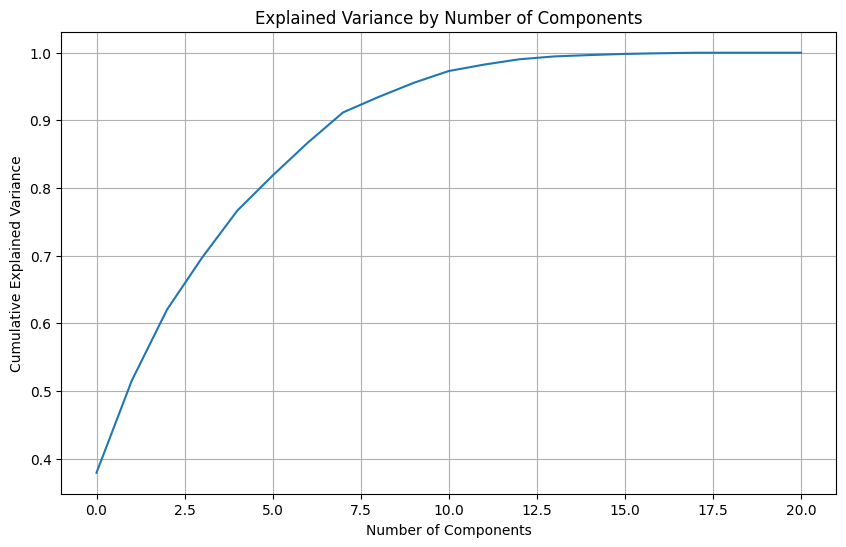

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [28]:
cumulative_variance = np.cumsum(explained_variance)
n_components_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1
print(f"Number of components explaining 90% of variance: {n_components_90}")

Number of components explaining 90% of variance: 8


In [29]:
pca_optimal = PCA(n_components=n_components_90)
X_pca_optimal = pca_optimal.fit_transform(df_cleaned)  

Kernel PCA => explore if the non-linear kernel-based approach captures more complex patterns that could be beneficial for models

In [30]:
from sklearn.decomposition import KernelPCA

In [31]:
import numpy as np

In [ ]:
kernel_pca = KernelPCA(n_components=n_components_90, kernel='rbf')
X_kernel_pca = kernel_pca.fit_transform(df_cleaned) # takes too much to run, looking for a solution 

Using X_pca_optimal for further modeling/ analysis 